In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel("https://github.com/risqikhoirul/DataMining/raw/main/Iris%20-%20Semester%203.xlsx")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Memilih fitur yang akan digunakan
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [4]:
# Menentukan jumlah kluster (k)
k = 3

In [5]:
# Membuat model K-MEANS
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [6]:
from scipy.spatial.distance import euclidean
# Hitung Euclidean Distance antara setiap data dan centroid
for i in range(k):
    centroid = kmeans.cluster_centers_[i]
    df[f'Euclidean_Distance_to_Center_{i + 1}'] = df.apply(lambda row: euclidean(row[1:5], centroid), axis=1)

In [7]:
# Simpan hasil clustering dan Euclidean Distance ke dalam file Excel
output_file = "output_clustering_results_Euclidean.xlsx"
df.to_excel(output_file, index=False)

In [8]:
# Menambahkan label kluster ke dalam DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan pusat kluster
print("Centroids:")
print(kmeans.cluster_centers_)


Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


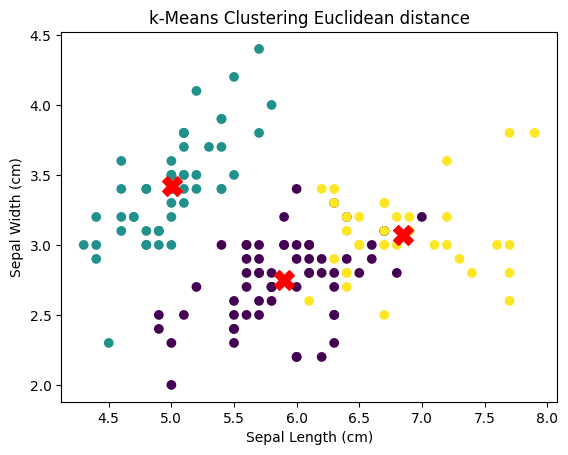

In [9]:
# Visualisasi hasil klustering
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title("k-Means Clustering Euclidean distance")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()